In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

Загружаем данные по полям

In [2]:
df = pd.read_excel('Dataset/ekoniva.xlsx', '1 Информация о полях', header=1).drop([0])
df[['fertility_score', 'area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph']] = df[['fertility_score', 'area', 'yield_plan', 'p2o5', 'k2o', 'humus', 'ph']].astype(float)
df

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,reproduction,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph
1,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,ЭС,Покупные,минимальная,3.8,221.05,206.30,4.05,5.25
2,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,NaN,NaN,минимальная,NaN,221.05,206.30,4.05,5.25
3,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,NaN,NaN,NaN,NaN,199.80,186.00,3.50,5.20
4,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,ЭС,Покупные,минимальная,3.8,186.50,174.80,5.90,5.40
5,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,ЭС,Покупные,минимальная,3.8,166.60,147.90,5.60,5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16056,72.22.10.044.00,Тюмень,пашня,4.0,2024,Одн.тр.(вика+овёс)корм,Козлятник пр.лет корм,NaN,40.70,Смесь сортов,Смесь репродукций,Покупные,минимальная,3.8,32.65,127.75,7.53,4.88
16057,72.22.10.045.00,Тюмень,пашня,3.0,2024,Козлятник 1 г.ж.корм,Козлятник пр.лет корм,1,103.44,Гале,РС-1,Покупные,минимальная,NaN,163.89,148.00,5.57,5.13
16058,72.22.10.046.00,Тюмень,пашня,NaN,2024,Одн.тр.(вика+овёс)корм,Яр.пшеница мягкая,NaN,5.56,Смесь сортов,Смесь репродукций,Покупные,минимальная,3.8,17.10,95.00,5.40,4.60
16059,72.22.10.047.00,Тюмень,пашня,3.0,2024,Яр.ячмень,Кормовые бобы,NaN,7.13,Эксплоер,ЭС,Покупные,минимальная,3.5,54.30,153.00,7.10,5.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16060 entries, 1 to 16060
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   field             16060 non-null  object 
 1   region            16060 non-null  object 
 2   land_type         16060 non-null  object 
 3   fertility_score   15267 non-null  float64
 4   season            16060 non-null  object 
 5   crop              16060 non-null  object 
 6   crop_predecessor  15718 non-null  object 
 7   crop_yearold      2678 non-null   object 
 8   area              16060 non-null  float64
 9   hybrid            8679 non-null   object 
 10  reproduction      8194 non-null   object 
 11  seed_origin       8468 non-null   object 
 12  technology        8766 non-null   object 
 13  yield_plan        10855 non-null  float64
 14  p2o5              10310 non-null  float64
 15  k2o               10317 non-null  float64
 16  humus             10272 non-null  float6

In [4]:
fields = df

Загружаем данные по работам

In [5]:
works = works = pd.read_csv('Dataset/works.csv')
works.head()

,season,field,yield_fact,area,absolut
0,2023,62.24.11.013.00,0.013139,4.05,0.053213
1,2023,02.12.11.001.00,0.658000,33.00,21.714000
2,2023,02.12.11.001.00,0.658000,33.00,21.714000
3,2023,02.12.11.001.00,0.609000,16.10,9.804900
4,2023,02.12.11.001.00,0.651000,15.00,9.765000


Собираем фактическую урожайность как отношение собранного урожая и площади поля с проведённой работой

In [6]:
group = works.groupby(['season', 'field']).aggregate({'absolut': 'sum', 'area': 'sum'}).reset_index()

group['yield_fact'] = group['absolut'] / group['area']
group = group.rename({'area': 'area_y'}, axis=1)
group['yield_fact'].describe()

count    4771.000000
mean        2.219187
std         1.418001
min         0.000000
25%         1.204000
50%         1.931655
75%         3.053194
max         6.769000
Name: yield_fact, dtype: float64

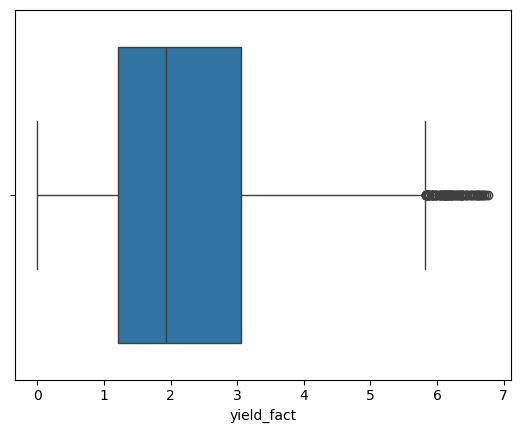

In [7]:
sns.boxplot(group, x='yield_fact')
None

Объединение данных

In [8]:
fields = fields.merge(group, on=['season', 'field'], how='left')
fields.head()

,field,region,land_type,fertility_score,season,crop,crop_predecessor,crop_yearold,area,hybrid,...,seed_origin,technology,yield_plan,p2o5,k2o,humus,ph,absolut,area_y,yield_fact
0,22.47.01.001.01,Алтай,пашня,NaN,2023,Оз.пшеница мягкая,Пар; Яр.пшеница мягкая,NaN,306.22,Скипетр,...,Покупные,минимальная,3.8,221.05,206.3,4.05,5.25,755.01510,306.22,2.465597
1,22.47.01.001.02,Алтай,пашня,NaN,2023,Пар,Пар; Яр.пшеница мягкая,NaN,63.16,NaN,...,NaN,минимальная,NaN,221.05,206.3,4.05,5.25,NaN,NaN,NaN
2,22.47.01.002.00,Алтай,пашня,4.0,2023,Пар,Яр.пшеница мягкая,NaN,485.79,NaN,...,NaN,NaN,NaN,199.80,186.0,3.50,5.20,NaN,NaN,NaN
3,22.47.01.003.00,Алтай,пашня,4.0,2023,Оз.пшеница мягкая,Пар,NaN,452.25,Скипетр,...,Покупные,минимальная,3.8,186.50,174.8,5.90,5.40,1177.06750,452.25,2.602692
4,22.47.01.004.00,Алтай,пашня,3.0,2023,Оз.пшеница мягкая,Пар,NaN,269.64,Скипетр,...,Покупные,минимальная,3.8,166.60,147.9,5.60,5.40,764.96084,269.64,2.836971


(4762, 4463)

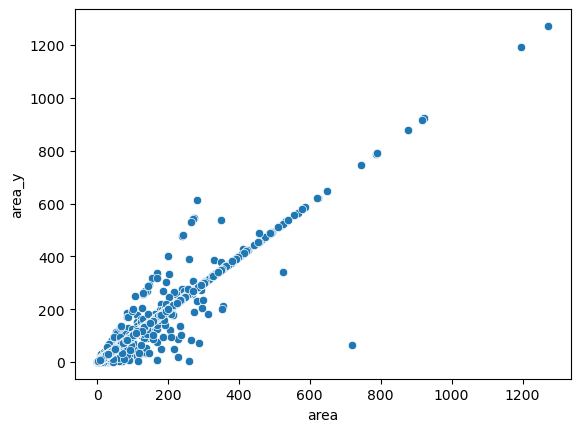

In [9]:
sns.scatterplot(fields, x='area', y='area_y')
len(fields[['area_y', 'area']].dropna()), len(fields[fields['area_y'] <= fields['area']])

Сохранения датасета

In [10]:
fields.to_csv('Dataset/fields_merged.csv', index=False)